In [32]:
# 回归问题
from keras.datasets import boston_housing
load_data = boston_housing.load_data()

In [33]:
(train_data, train_targets), (test_data, test_targets) = load_data

In [34]:
train_data.shape

(404, 13)

In [35]:
test_data.shape

(102, 13)

In [36]:
# 归一化
mean = train_data.mean(axis = 0)
mean.shape

(13,)

In [37]:
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

In [38]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [39]:
test_data

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

In [40]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss='mse', metrics = ['mae'])
    return model

In [41]:
# k折验证
import numpy as np

k = 4
num_val_samples = len(train_data) / k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    sp = int(i * num_val_samples)
    ep = int((i + 1) * num_val_samples)
    val_data = train_data[sp:ep]
    val_targets = train_targets[sp:ep]
    
    partial_train_data = np.concatenate(
        [train_data[:sp],
        train_data[ep:]],
        axis = 0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:sp],
        train_targets[ep:]],
        axis = 0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size = 1, verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [42]:
all_scores

[2.0873247479448223, 2.2237626916111104, 2.9682228777668263, 2.337544564563449]

In [43]:
np.mean(all_scores) # 平均值

2.404213720471552

In [44]:
np.std(all_scores) # 标准差

0.33746566513804876

In [45]:
# 保存验证结果
from tensorflow import keras
class PrintEpo(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if (epoch+1) % 100 == 0: print(epoch+1)

num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    sp = int(i * num_val_samples)
    ep = int((i + 1) * num_val_samples)
    val_data = train_data[sp:ep]
    val_targets = train_targets[sp:ep]
    
    partial_train_data = np.concatenate(
        [train_data[:sp],
        train_data[ep:]],
        axis = 0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:sp],
        train_targets[ep:]],
        axis = 0)
    
    model = build_model()
    # model.summary()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets), epochs=num_epochs,
                        batch_size = 1, verbose = 0, callbacks=[PrintEpo()])
    print([i for i in history.history])
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_50 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
100
200
300
400
500
['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error']
processing fold # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_53 

In [46]:
all_mae_histories

[[3.8352136139822477,
  2.78739854604891,
  2.595707137985985,
  2.3452521975677794,
  2.407236967936601,
  2.41945209125481,
  2.263771689764344,
  2.272067070007324,
  2.174279722836938,
  2.3241192940438147,
  2.1019327050388448,
  2.3046825427820186,
  2.1166409501934997,
  1.9572545372613586,
  1.9279242222852047,
  2.125925644789592,
  2.0339365760878763,
  1.8887198797546991,
  2.245259407723304,
  2.087600320872694,
  1.8733521074351698,
  1.8656840229978655,
  1.8230594125124489,
  1.8881676928831799,
  1.9407830663246683,
  1.944841177156656,
  1.842905832989381,
  1.8270909998676566,
  1.8405258207037898,
  2.2071471922468433,
  2.0401577477407926,
  2.280502177701138,
  2.202626898737237,
  2.1256004654534975,
  1.9776302092146165,
  1.9955008525659543,
  2.3869207873202787,
  1.8331083165537012,
  1.8471333532050105,
  2.089487349632943,
  1.9494138944267045,
  1.9696998879461005,
  2.0423367283131815,
  1.9654370770596041,
  1.8918915219826273,
  2.1571049076495785,
  2.0

In [47]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]
average_mae_history

[4.798827010806244,
 3.3835968900435036,
 3.0598050615575056,
 2.747022745632889,
 2.799961857276388,
 2.700367254785972,
 2.6401108904640274,
 2.631333144584505,
 2.5647677348391844,
 2.5904801729882116,
 2.499713136418031,
 2.7388394728745564,
 2.516434583333459,
 2.3956933328420806,
 2.429426873084342,
 2.420616355272803,
 2.474435093379257,
 2.4371474639023885,
 2.365400051716531,
 2.4939670657167343,
 2.3798423580604027,
 2.340766982276841,
 2.312921212451293,
 2.3397355799627775,
 2.49385927927376,
 2.332370256433393,
 2.286597989573337,
 2.4110929157474255,
 2.31259420071498,
 2.4388882311263886,
 2.372295315903012,
 2.490610706924212,
 2.3371159168753297,
 2.4472242865231957,
 2.414686587777468,
 2.2858836096112087,
 2.3898732980879225,
 2.3255856355818194,
 2.317072677140189,
 2.3789613122987276,
 2.274672281624067,
 2.315096907096334,
 2.2783137205803747,
 2.3000637635146037,
 2.244198421440502,
 2.5013373016130807,
 2.3286992736382057,
 2.3577905185151806,
 2.358370780354679

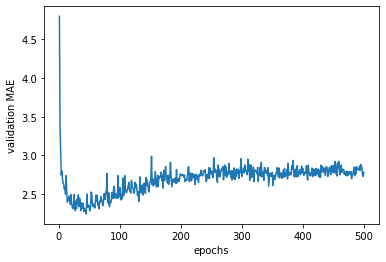

In [50]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('epochs')
plt.ylabel('validation MAE')
plt.show()

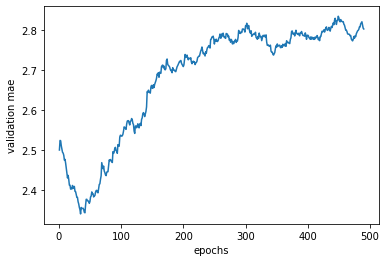

In [51]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            prev = smoothed_points[-1]
            smoothed_points.append(prev * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('epochs')
plt.ylabel('validation mae')
plt.show()

In [52]:
# 最终
model = build_model()
model.fit(train_data, train_targets, epochs=60, batch_size=16, verbose=0)

In [54]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print("test_mse_score: ${:7.2f}".format(test_mse_score * 1000))
print("test_mae_score: ${:7.2f}".format(test_mae_score * 1000))

102/102 [==============================] - 0s 2ms/step
test_mse_score: $19294.20
test_mae_score: $2794.22


In [55]:
# 预测
predictions = model.predict(test_data).flatten()
predictions

array([ 8.956223 , 18.786743 , 22.106457 , 33.46755  , 25.124683 ,
       20.610764 , 28.210629 , 22.146494 , 20.33973  , 22.482845 ,
       19.517706 , 17.179718 , 16.401129 , 42.791504 , 20.343426 ,
       19.957321 , 26.40434  , 18.864645 , 19.506104 , 28.755096 ,
       11.940053 , 15.425263 , 21.374063 , 15.4895525, 20.163307 ,
       25.55663  , 31.119545 , 31.569233 , 11.869202 , 19.963554 ,
       19.726555 , 15.612796 , 35.066593 , 24.69196  , 18.438747 ,
        8.576688 , 17.176142 , 18.829327 , 21.834387 , 27.62548  ,
       30.668484 , 27.502583 , 14.509754 , 43.416107 , 29.662678 ,
       26.147018 , 28.089493 , 17.100115 , 24.105621 , 22.416584 ,
       36.96295  , 20.013    , 11.786879 , 15.503439 , 35.75753  ,
       27.924606 , 12.958047 , 48.376896 , 36.137825 , 23.792154 ,
       25.176271 , 17.516052 , 15.817146 , 18.900623 , 23.801905 ,
       21.49114  , 13.940717 , 22.995914 , 13.658099 ,  7.3855724,
       28.400545 , 31.555328 , 26.789074 , 14.505999 , 26.0248

In [56]:
test_targets

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

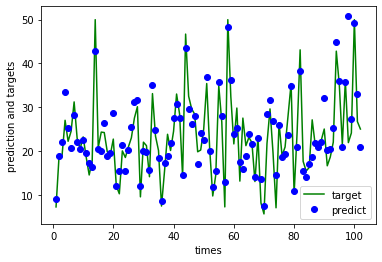

In [58]:
plt.plot(range(1, len(test_targets) + 1), test_targets, 'g', label='target')
plt.plot(range(1, len(test_targets) + 1), predictions, 'bo', label='predict')
plt.xlabel('times')
plt.ylabel('prediction and targets')
plt.legend()
plt.show()